In [1]:
import os
import sys
import math
import copy

if sys.platform=="cygwin":
    from cyglibra_core import *
elif sys.platform=="linux" or sys.platform=="linux2":
    from liblibra_core import *

from libra_py import units
import libra_py.workflows.nbra.step2_analysis as step2a
from libra_py import data_read
from libra_py import data_conv
from libra_py import data_stat
from libra_py import data_outs


import matplotlib.pyplot as plt   # plots
#import numpy as np
#from matplotlib.mlab import griddata

%matplotlib inline 

plt.rc('axes', titlesize=24)      # fontsize of the axes title
plt.rc('axes', labelsize=20)      # fontsize of the x and y labels
plt.rc('legend', fontsize=20)     # legend fontsize
plt.rc('xtick', labelsize=16)    # fontsize of the tick labels
plt.rc('ytick', labelsize=16)    # fontsize of the tick labels

plt.rc('figure.subplot', left=0.2)
plt.rc('figure.subplot', right=0.95)
plt.rc('figure.subplot', bottom=0.13)
plt.rc('figure.subplot', top=0.88)

colors = {}

colors.update({"11": "#8b1a0e"})  # red       
colors.update({"12": "#FF4500"})  # orangered 
colors.update({"13": "#B22222"})  # firebrick 
colors.update({"14": "#DC143C"})  # crimson   

colors.update({"21": "#5e9c36"})  # green
colors.update({"22": "#006400"})  # darkgreen  
colors.update({"23": "#228B22"})  # forestgreen
colors.update({"24": "#808000"})  # olive      

colors.update({"31": "#8A2BE2"})  # blueviolet
colors.update({"32": "#00008B"})  # darkblue  

colors.update({"41": "#2F4F4F"})  # darkslategray

clrs_index = ["11", "21", "31", "41", "12", "22", "32", "13","23", "14", "24"]

/home/alexey/miniconda2/envs/libra/lib/python2.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: to-Python converter for std::vector<std::complex<double>, std::allocator<std::complex<double> > > already registered; second conversion method ignored.
  if __name__ == '__main__':
/home/alexey/miniconda2/envs/libra/lib/python2.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: to-Python converter for std::vector<std::vector<int, std::allocator<int> >, std::allocator<std::vector<int, std::allocator<int> > > > already registered; second conversion method ignored.
  if __name__ == '__main__':
/home/alexey/miniconda2/envs/libra/lib/python2.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: to-Python converter for boost::python::detail::container_element<std::vector<std::vector<int, std::allocator<int> >, std::allocator<std::vector<int, std::allocator<int> > > >, unsigned long, boost::python::detail::final_vector_derived_policies<std::vector<std::vector<int, std::allocator<in

The system containes 56 electrons, so the original HOMO = 28 (starting from 1)

But we have decided to compute states only from minband = 20 to maxband = 39, so 20 in total

The files contain alpha and beta blocks, so we only need the only half of the orbitals - so in the script below we set active_space to range(0,20). 

In [2]:
prms = { "data_dim": 40, 
         "active_space":range(0,20),
         "isnap": 0, "fsnap": 10         
       }

prms.update({"data_re_prefix" : "res/0_Hprime_", "data_re_suffix" : "x_re",
             "data_im_prefix" : "res/0_Hprime_", "data_im_suffix" : "x_im"})
Hprime_x = data_read.get_data(prms)

prms.update({"data_re_prefix" : "res/0_Hprime_", "data_re_suffix" : "y_re",
             "data_im_prefix" : "res/0_Hprime_", "data_im_suffix" : "y_im"})
Hprime_y = data_read.get_data(prms)

prms.update({"data_re_prefix" : "res/0_Hprime_", "data_re_suffix" : "z_re",
             "data_im_prefix" : "res/0_Hprime_", "data_im_suffix" : "z_im"})
Hprime_z = data_read.get_data(prms)

prms.update({"data_re_prefix" : "res/hvib_dia_", "data_re_suffix" : "_re",
             "data_im_prefix" : "res/hvib_dia_", "data_im_suffix" : "_im"})
Hvib = data_read.get_data(prms)

Then, we need some re-indexing:

Original indices ... 20 21 22 23 24 25 26 27 28 29 30 ...

New indexing...       0  1  2  3  4  5  6  7  8  9 10 ...

So, HOMO = 8

In [3]:
params = {"HOMO": 8, "opt":1 }
E, osc_str, istep, init_st, fin_st = step2a.compute_spectrum(Hvib, Hprime_x, Hprime_y, Hprime_z, params)

print "======== Sorting by oscillator's strength (reversed order) ==========="
sz = len(E)
for i in xrange(sz-10, sz):
    print i, E[i], osc_str[i], istep[i], init_st[i], fin_st[i]
    


params = {"HOMO": 8, "opt":0 }
E, osc_str, istep, init_st, fin_st = step2a.compute_spectrum(Hvib, Hprime_x, Hprime_y, Hprime_z, params)

print "======== Sorting by energies ==========="
for i in xrange(10):
    print i, E[i], osc_str[i], istep[i], init_st[i], fin_st[i]

======== Sorting by oscillator's strength (reversed order) ===========
980 0.002504255 21.58595402 9 8 9
981 0.002491894 21.7264815907 8 8 9
982 0.002474582 21.8661189114 1 8 9
983 0.002475159 21.8691993821 7 8 9
984 0.002438578 22.2289891473 0 8 9
985 0.0024211 22.3587050915 6 8 9
986 0.002385103 22.699784072 2 8 9
987 0.00232301 23.3339489869 5 8 9
988 0.002260314 23.9691905424 3 8 9
989 0.00226279 23.9796283647 4 8 9
======== Sorting by energies ===========
0 0.002260314 23.9691905424 3 8 9
1 0.00226279 23.9796283647 4 8 9
2 0.00232301 23.3339489869 5 8 9
3 0.002385103 22.699784072 2 8 9
4 0.0024211 22.3587050915 6 8 9
5 0.002438578 22.2289891473 0 8 9
6 0.002474582 21.8661189114 1 8 9
7 0.002475159 21.8691993821 7 8 9
8 0.002491894 21.7264815907 8 8 9
9 0.002504255 21.58595402 9 8 9


Now, lets plot the absorption spectrum: average oscillator strength per bin vs. energy

Together with it, we plot the distribution of average oscillator strengths vs. initial or final state - this can help tell you which transitions are involved

These calculations do not depend on how we sort the final data

In [4]:
nE, nOSC = data_stat.compute_density(E, osc_str, 0.0, 0.75, 0.01)
nIS, nOSC1 = data_stat.compute_density(init_st, osc_str, 0, 25, 1)
nFS, nOSC2 = data_stat.compute_density(fin_st, osc_str, 0, 25, 1)

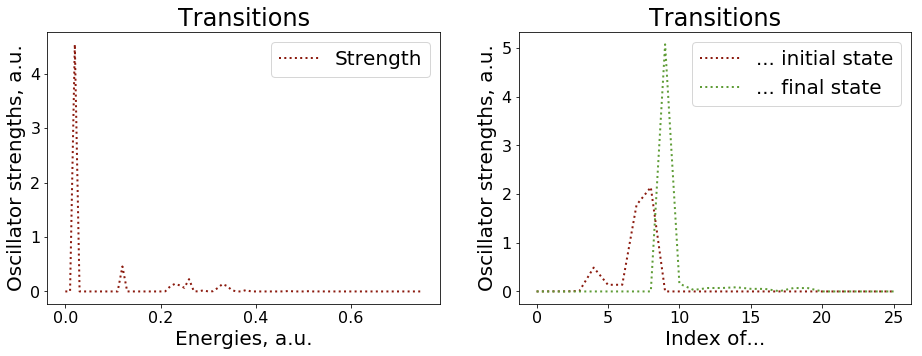

In [6]:
plt.figure(1, figsize=(16, 5)) # dpi=300, frameon=False)

plt.subplot(1,2,1)
plt.title('Transitions')
plt.xlabel('Energies, a.u.')
plt.ylabel('Oscillator strengths, a.u.')
plt.plot(nE, nOSC, label='Strength', linestyle=":", linewidth=2, color = colors["11"]) 
plt.legend()

plt.subplot(1,2,2)
plt.title('Transitions')
plt.xlabel('Index of...')
plt.ylabel('Oscillator strengths, a.u.')
plt.plot(nIS, nOSC1, label='... initial state', linestyle=":", linewidth=2, color = colors["11"]) 
plt.plot(nFS, nOSC2, label='... final state', linestyle=":", linewidth=2, color = colors["21"]) 
plt.legend()


plt.show()
plt.close()